In [89]:

import seaborn as sns
from scipy.stats import kurtosis, skew
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
import numpy as np

In [41]:
df = pd.read_csv('wine-reviews.csv',index_col=0)
df.index+=1

In [42]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
2,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
3,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
4,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
5,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [43]:
df.shape

(129971, 13)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 1 to 129971
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


**Points:** the number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)

**Title:** the title of the wine review, which often contains the vintage if you're interested in extracting that feature
    
**Variety:** the type of grapes used to make the wine (ie Pinot Noir)
    
**Description:** a few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.
    
**Country:** the country that the wine is from
    
**Province:** the province or state that the wine is from
    
**Region 1:** the wine growing area in a province or state (ie Napa)
    
**Region 2:** sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank
    
**Winery**: the winery that made the wine
    
**Designation:** the vineyard within the winery where the grapes that made the wine are from
    
**Price:** the cost for a bottle of the wine
    
**Taster Name:** name of the person who tasted and reviewed the wine

**Taster_twitter_handle:** twitter handle of taster

In [45]:
df.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [46]:
df.isna().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [47]:
df.taster_name.value_counts()


Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

In [48]:
df.designation.value_counts()

Reserve                          2009
Estate                           1322
Reserva                          1259
Riserva                           698
Estate Grown                      621
                                 ... 
Ilercavònia                         1
VA                                  1
Sein                                1
Vigna Riserva                       1
Lieu-dit Harth Cuvée Caroline       1
Name: designation, Length: 37979, dtype: int64

In [49]:
df.designation.value_counts()

Reserve                          2009
Estate                           1322
Reserva                          1259
Riserva                           698
Estate Grown                      621
                                 ... 
Ilercavònia                         1
VA                                  1
Sein                                1
Vigna Riserva                       1
Lieu-dit Harth Cuvée Caroline       1
Name: designation, Length: 37979, dtype: int64

In [50]:
df.drop(["taster_twitter_handle",'taster_name','designation','region_2','title'],axis=1,inplace=True)

In [51]:
df.head(5)

,country,description,points,price,province,region_1,variety,winery
1,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,White Blend,Nicosia
2,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Portuguese Red,Quinta dos Avidagos
3,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Pinot Gris,Rainstorm
4,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Riesling,St. Julian
5,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Pinot Noir,Sweet Cheeks


In [52]:
max_reg=df.region_1.value_counts().max()


In [53]:
df['variety'].fillna(method='bfill',inplace=True)
df['region_1'].fillna(value=max_reg,inplace=True)

In [54]:

mean=df.price.median()
df['price'].fillna(value=mean,inplace=True)
df.dropna(subset=["country","province"],inplace=True)
mean

25.0

In [55]:
df

,country,description,points,price,province,region_1,variety,winery
1,Italy,"Aromas include tropical fruit, broom, brimston...",87,25.0,Sicily & Sardinia,Etna,White Blend,Nicosia
2,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,4480,Portuguese Red,Quinta dos Avidagos
3,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Pinot Gris,Rainstorm
4,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Riesling,St. Julian
5,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...
129967,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,4480,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129968,US,Citation is given as much as a decade of bottl...,90,75.0,Oregon,Oregon,Pinot Noir,Citation
129969,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Alsace,Gewürztraminer,Domaine Gresser
129970,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,Alsace,Pinot Gris,Domaine Marcel Deiss


In [56]:
df.isnull().sum()

country        0
description    0
points         0
price          0
province       0
region_1       0
variety        0
winery         0
dtype: int64

In [57]:
df.head()

,country,description,points,price,province,region_1,variety,winery
1,Italy,"Aromas include tropical fruit, broom, brimston...",87,25.0,Sicily & Sardinia,Etna,White Blend,Nicosia
2,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,4480,Portuguese Red,Quinta dos Avidagos
3,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Pinot Gris,Rainstorm
4,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Riesling,St. Julian
5,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Pinot Noir,Sweet Cheeks


In [58]:
df.country.value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

US                       
France                    
Italy                     
Spain            

In [59]:
c=df.groupby(df['country'])['points'].count().sort_values(ascending=True).index[:5]

# Let's create a dictionary, the functional way
 
# Create your dictionary class
class my_dictionary(dict):
 
  # __init__ function
    def __init__(self):
        self = dict()

      # Function to add key:value
    def add(self, key, value):
        self[key] = value


price = my_dictionary()
points= my_dictionary()
for i in c:  
    price.add(i,df[df['country']==i]['price'].sort_values(ascending=False).max())
    points.add(i,df[df['country']==i]['points'].sort_values(ascending=False).max())


pricelow = my_dictionary()
pointslow= my_dictionary()
for i in c:  
    pricelow.add(i,df[df['country']==i]['price'].sort_values(ascending=False).min())
    pointslow.add(i,df[df['country']==i]['points'].sort_values(ascending=False).min())


pointslow

{'China': 89,
 'Slovakia': 87,
 'Egypt': 84,
 'Armenia': 87,
 'Bosnia and Herzegovina': 85}

In [60]:
pricelow

{'China': 18.0,
 'Slovakia': 16.0,
 'Egypt': 25.0,
 'Armenia': 14.0,
 'Bosnia and Herzegovina': 12.0}

In [61]:
points

{'China': 89,
 'Slovakia': 87,
 'Egypt': 84,
 'Armenia': 88,
 'Bosnia and Herzegovina': 88}

In [62]:
df.province.value_counts()

California        36247
Washington         8639
Bordeaux           5941
Tuscany            5897
Oregon             5373
                  ...  
Messinia              1
Markopoulo            1
Paardeberg            1
Krania Olympus        1
Neuchâtel             1
Name: province, Length: 425, dtype: int64

In [63]:
p=df.groupby(df['province'])['points'].count().sort_values(ascending=False).index[:10]

# Let's create a dictionary, the functional way
 
price_province = my_dictionary()
points_province= my_dictionary()
for i in p:  
    price_province.add(i,df[df['province']==i]['price'].sort_values(ascending=False).max())
    points_province.add(i,df[df['province']==i]['points'].sort_values(ascending=False).max())

p

Index(['California', 'Washington', 'Bordeaux', 'Tuscany', 'Oregon', 'Burgundy',
       'Northern Spain', 'Piedmont', 'Mendoza Province', 'Veneto'],
      dtype='object', name='province')

In [64]:
price_province

{'California': 2013.0,
 'Washington': 240.0,
 'Bordeaux': 3300.0,
 'Tuscany': 900.0,
 'Oregon': 275.0,
 'Burgundy': 2500.0,
 'Northern Spain': 600.0,
 'Piedmont': 595.0,
 'Mendoza Province': 230.0,
 'Veneto': 530.0}

In [65]:
points_province

{'California': 100,
 'Washington': 100,
 'Bordeaux': 100,
 'Tuscany': 100,
 'Oregon': 99,
 'Burgundy': 99,
 'Northern Spain': 98,
 'Piedmont': 99,
 'Mendoza Province': 97,
 'Veneto': 96}

In [66]:
df.isnull().sum()

country        0
description    0
points         0
price          0
province       0
region_1       0
variety        0
winery         0
dtype: int64

In [67]:
region_1=df.groupby(df['region_1'])['points'].count().sort_values(ascending=False).index[:5]

# Let's create a dictionary, the functional way
 
price_region_1 = my_dictionary()
points_region_1= my_dictionary()
for i in region_1:  
    price_region_1.add(i,df[df['region_1']==i]['price'].sort_values(ascending=False).max())
    points_region_1.add(i,df[df['region_1']==i]['points'].sort_values(ascending=False).max())

price_region_1

{4480: 1100.0,
 'Napa Valley': 625.0,
 'Columbia Valley (WA)': 240.0,
 'Russian River Valley': 125.0,
 'California': 175.0}

In [68]:
points_region_1

{4480: 100,
 'Napa Valley': 100,
 'Columbia Valley (WA)': 100,
 'Russian River Valley': 98,
 'California': 97}

In [69]:
winery=df.groupby(df['winery'])['points'].count().sort_values(ascending=False).index[:10]

# Let's create a dictionary, the functional way
 
price_winery = my_dictionary()
points_winery= my_dictionary()
for i in winery:  
    price_winery.add(i,df[df['winery']==i]['price'].sort_values(ascending=False).max())
    points_winery.add(i,df[df['winery']==i]['points'].sort_values(ascending=False).max())
price_winery

{'Wines & Winemakers': 77.0,
 'Testarossa': 87.0,
 'DFJ Vinhos': 50.0,
 'Williams Selyem': 125.0,
 'Louis Latour': 650.0,
 'Georges Duboeuf': 43.0,
 'Chateau Ste. Michelle': 65.0,
 'Concha y Toro': 200.0,
 'Columbia Crest': 45.0,
 'Kendall-Jackson': 125.0}

In [70]:
points_winery

{'Wines & Winemakers': 93,
 'Testarossa': 96,
 'DFJ Vinhos': 92,
 'Williams Selyem': 99,
 'Louis Latour': 97,
 'Georges Duboeuf': 92,
 'Chateau Ste. Michelle': 96,
 'Concha y Toro': 93,
 'Columbia Crest': 92,
 'Kendall-Jackson': 97}

In [71]:

variety=df.groupby(df['variety'])['points'].count().sort_values(ascending=False).index[:5]
varietylow=df.groupby(df['variety'])['points'].count().sort_values(ascending=True).index[:5]
# Let's create a dictionary, the functional way
 
price_variety = my_dictionary()
 
price_varietylow = my_dictionary()
points_variety= my_dictionary()
points_varietylow= my_dictionary()
for i in varietylow:  
    price_variety.add(i,df[df['variety']==i]['price'].sort_values(ascending=False).max())
    price_varietylow.add(i,df[df['variety']==i]['price'].sort_values(ascending=True).min())
    points_variety.add(i,df[df['variety']==i]['points'].sort_values(ascending=False).max())
    points_varietylow.add(i,df[df['variety']==i]['points'].sort_values(ascending=True).min())
price_varietylow

{'Žilavka': 15.0,
 'Prunelard': 23.0,
 'Premsal': 15.0,
 'Piquepoul Blanc': 13.0,
 'Pinotage-Merlot': 10.0}

In [72]:
points_varietylow

{'Žilavka': 88,
 'Prunelard': 91,
 'Premsal': 83,
 'Piquepoul Blanc': 88,
 'Pinotage-Merlot': 84}

In [73]:
df.to_csv("New_WineReviews.csv")

Top 5 Countries having high demand for wine : 
 - 'US': 
 - 'France': 
 'Italy': 
 'Spain': 
 'Portugal': 
Top 5 Province having high demand for wine :  
  California': 
 'Washington': 
 'Bordeaux':
 'Tuscany': 
 'Oregon': 

Most Loved varieties of wine are :
Chardonnay': 
 'Cabernet Sauvignon': 
 'Bordeaux-style Red Blend': 
Top wineries :
    Williams Selyem'
    Louis Latour'

    Least loved wine varieties :
Pinotage-Merlot'
Premsal': 

In [74]:
df[df['variety']=='Pinotage-Merlot']

,country,description,points,price,province,region_1,variety,winery
52272,South Africa,This blend of 70% Pinotage and 30% Merlot show...,84,10.0,Polkadraai Hills,4480,Pinotage-Merlot,Stellenbosch Hills


In [75]:
df[(df['country']=='US') & (df['points']==100)]

,country,description,points,price,province,region_1,variety,winery
45799,US,Tasted in a flight of great and famous Napa wi...,100,200.0,California,Napa Valley,Cabernet Sauvignon,Cardinale
113930,US,In 2005 Charles Smith introduced three high-en...,100,80.0,Washington,Columbia Valley (WA),Syrah,Charles Smith
118059,US,This wine dazzles with perfection. Sourced fro...,100,450.0,California,Sonoma County,Bordeaux-style Red Blend,Verité
123546,US,Initially a rather subdued Frog; as if it has ...,100,80.0,Washington,Walla Walla Valley (WA),Syrah,Cayuse


In [76]:
Verité is expensive but popular wine in US followed by Cabernet Sauvignon .
Syrah wine is popular and affordable wine in US



SyntaxError: invalid syntax (Temp/ipykernel_15312/2118863298.py, line 1)

In [ ]:
df[(df['country']=='France') & (df['points']==100)]

In [77]:
Bordeaux-style Red Blend is expensive and popular wine in France

SyntaxError: invalid syntax (Temp/ipykernel_15312/3154817209.py, line 1)

In [78]:
df[(df['country']=='Italy') & (df['points']==100)]

,country,description,points,price,province,region_1,variety,winery
7336,Italy,Thick as molasses and dark as caramelized brow...,100,210.0,Tuscany,Vin Santo di Montepulciano,Prugnolo Gentile,Avignonesi
39287,Italy,"A perfect wine from a classic vintage, the 200...",100,460.0,Tuscany,Toscana,Merlot,Tenuta dell'Ornellaia
45782,Italy,"This gorgeous, fragrant wine opens with classi...",100,550.0,Tuscany,Brunello di Montalcino,Sangiovese,Biondi Santi
111755,Italy,It takes only a few moments before you appreci...,100,270.0,Tuscany,Brunello di Montalcino,Sangiovese Grosso,Casanova di Neri


In [79]:
Expensive wine in Italy-Sangiovese

SyntaxError: invalid syntax (Temp/ipykernel_15312/2463771778.py, line 1)

Text(0.5, 0, '')

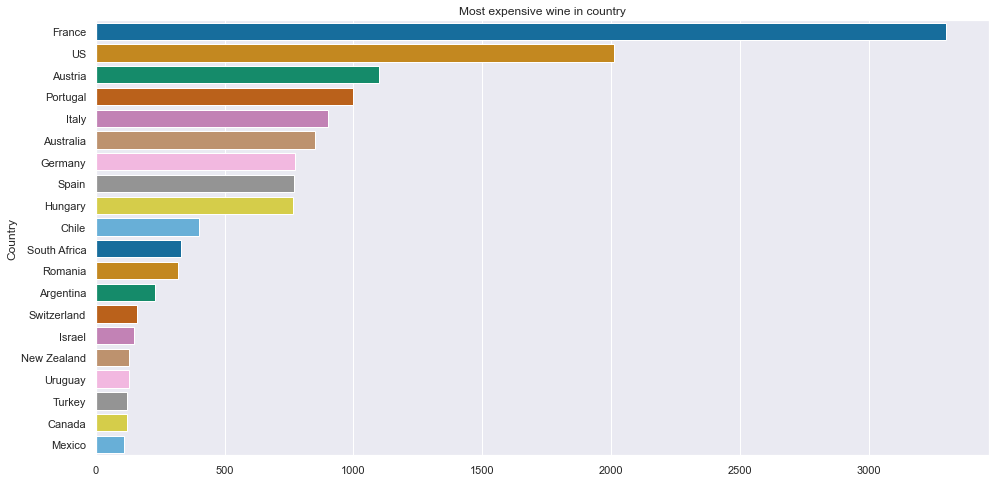

In [81]:
plt.figure(figsize=(16,8))

cnt = df.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:20]
g2 = sns.barplot(x = cnt['price'], y = cnt.index, palette= 'colorblind')
g2.set_title('Most expensive wine in country')
g2.set_ylabel('Country')
g2.set_xlabel('')

In [87]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91906\AppData\Roaming\nltk_data...


True

In [90]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

SIA = SentimentIntensityAnalyzer()

# Applying Model, Variable Creation
sentiment = df.sample(15000).copy()
sentiment['polarity_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['compound'])
sentiment['neutral_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['neu'])
sentiment['negative_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['neg'])
sentiment['positive_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['pos'])

sentiment['sentiment']= np.nan
sentiment.loc[sentiment.polarity_score>0,'sentiment']='POSITIVE'
sentiment.loc[sentiment.polarity_score==0,'sentiment']='NEUTRAL'
sentiment.loc[sentiment.polarity_score<0,'sentiment']='NEGATIVE'


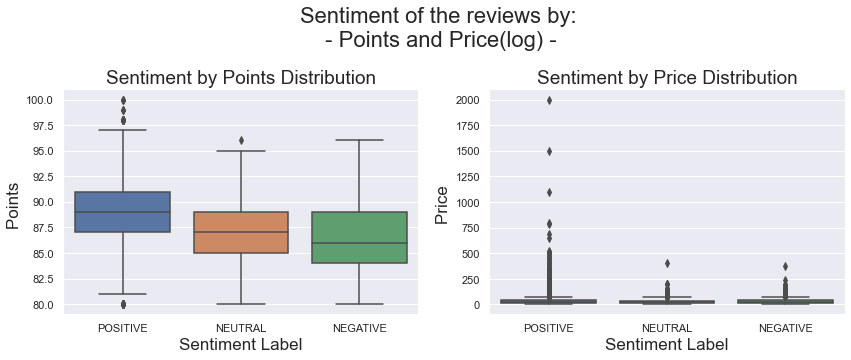

In [123]:
plt.figure(figsize=(14,5))

plt.suptitle('Sentiment of the reviews by: \n- Points and Price(log) -', size=22)

plt.subplot(121)
ax = sns.boxplot(x='sentiment', y='points', data=sentiment,palette = 'deep')
ax.set_title("Sentiment by Points Distribution", fontsize=19)
ax.set_ylabel("Points ", fontsize=17)
ax.set_xlabel("Sentiment Label", fontsize=17)

plt.subplot(122)
ax1= sns.boxplot(x='sentiment', y='price', data=sentiment,palette = 'deep')
ax1.set_title("Sentiment by Price Distribution", fontsize=19)
ax1.set_ylabel("Price ", fontsize=17)
ax1.set_xlabel("Sentiment Label", fontsize=17)

plt.subplots_adjust(top = 0.75, wspace=.2)
plt.show()

In [ ]:
- Despite its high price, Verité is a popular wine in the United States, followed by Cabernet Sauvignon